<h1>A/B-тестирование<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор" data-toc-modified-id="Обзор-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Типы-данных" data-toc-modified-id="Типы-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Типы данных</a></span></li><li><span><a href="#Поиск-аномалий" data-toc-modified-id="Поиск-аномалий-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Поиск аномалий</a></span><ul class="toc-item"><li><span><a href="#Дубликаты" data-toc-modified-id="Дубликаты-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Дубликаты</a></span></li><li><span><a href="#Пропуски" data-toc-modified-id="Пропуски-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Пропуски</a></span></li><li><span><a href="#Аномалии" data-toc-modified-id="Аномалии-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Аномалии</a></span></li></ul></li></ul></li><li><span><a href="#Оценика-корректности-проведения-теста" data-toc-modified-id="Оценика-корректности-проведения-теста-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Оценика корректности проведения теста</a></span><ul class="toc-item"><li><span><a href="#Проверка-на-соответствие-техническому-заданию" data-toc-modified-id="Проверка-на-соответствие-техническому-заданию-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Проверка на соответствие техническому заданию</a></span></li><li><span><a href="#Время-проведения-теста" data-toc-modified-id="Время-проведения-теста-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Время проведения теста</a></span></li><li><span><a href="#Аудитория-теста" data-toc-modified-id="Аудитория-теста-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Аудитория теста</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ" data-toc-modified-id="Исследовательский-анализ-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ</a></span><ul class="toc-item"><li><span><a href="#Распределение-по-количеству" data-toc-modified-id="Распределение-по-количеству-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Распределение по количеству</a></span></li><li><span><a href="#По-дням" data-toc-modified-id="По-дням-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>По дням</a></span></li><li><span><a href="#Конверсия" data-toc-modified-id="Конверсия-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Конверсия</a></span></li><li><span><a href="#Особенности" data-toc-modified-id="Особенности-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Особенности</a></span></li></ul></li><li><span><a href="#Оценка-результата-A/B-тестирования" data-toc-modified-id="Оценка-результата-A/B-тестирования-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Оценка результата A/B-тестирования</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

**Цель исследования:** Проведение оценки результатов A/B-теста после введения улучшенной программы рекомендаций для региона EU



**Ход работы:**
- Исследование данных
- Оцените корректность проведения теста
- Проведите исследовательский анализ данны
- Оцените результаты A/B-тестирования

# Обзор

In [1]:
#Загрука библиотек
import pandas as pd
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from plotly import graph_objects as go
import scipy.stats as stats

In [2]:
#Загрузка данных
try:
    marketing_events, events, new_users, participants = (
        pd.read_csv('D:\IT\python\yandex\DA\poject\sprint_fin\sp_fin_ab\dt_ab_project_marketing_events.csv'),
        pd.read_csv('D:\IT\python\yandex\DA\poject\sprint_fin\sp_fin_ab\dt_final_ab_events.csv'),
        pd.read_csv('D:\IT\python\yandex\DA\poject\sprint_fin\sp_fin_ab\dt_final_ab_new_users.csv'),
        pd.read_csv('D:\IT\python\yandex\DA\poject\sprint_fin\sp_fin_ab\dt_final_ab_participants.csv')
    )
except:
    marketing_events, events, new_users, participants = (
        pd.read_csv('/datasets/ab_project_marketing_events.csv'),
        pd.read_csv('/datasets/final_ab_events.csv'),
        pd.read_csv('/datasets/final_ab_new_users.csv'),
        pd.read_csv('/datasets/final_ab_participants.csv')
    )

In [3]:
#функция для обзора данных
def review(data):
    info = data.info()
    return display(data), info

In [4]:
datas = [marketing_events, events, new_users, participants]
title = ['marketing_events', 'events', 'new_users', 'participants']

for i, t in zip(datas, title):
    print(t, '\n')
    review(i)

marketing_events 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


events 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     440317 non-null  object 
 1   event_dt    440317 non-null  object 
 2   event_name  440317 non-null  object 
 3   details     62740 non-null   float64
dtypes: float64(1), object(3)
memory usage: 13.4+ MB


,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99
...,...,...,...,...
440312,245E85F65C358E08,2020-12-30 19:35:55,login,NaN
440313,9385A108F5A0A7A7,2020-12-30 10:54:15,login,NaN
440314,DB650B7559AC6EAC,2020-12-30 10:59:09,login,NaN
440315,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,NaN


new_users 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     61733 non-null  object
 1   first_date  61733 non-null  object
 2   region      61733 non-null  object
 3   device      61733 non-null  object
dtypes: object(4)
memory usage: 1.9+ MB


,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone
...,...,...,...,...
61728,1DB53B933257165D,2020-12-20,EU,Android
61729,538643EB4527ED03,2020-12-20,EU,Mac
61730,7ADEE837D5D8CBBD,2020-12-20,EU,PC
61731,1C7D23927835213F,2020-12-20,EU,iPhone


participants 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  18268 non-null  object
 1   group    18268 non-null  object
 2   ab_test  18268 non-null  object
dtypes: object(3)
memory usage: 428.3+ KB


,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test
...,...,...,...
18263,1D302F8688B91781,B,interface_eu_test
18264,3DE51B726983B657,A,interface_eu_test
18265,F501F79D332BE86C,A,interface_eu_test
18266,63FBE257B05F2245,A,interface_eu_test


В ходе обзора данных было выявлено:

marketing_events - тип данные в столбцах start_dt, finish_dt надо поправить.

events - в столбце details много пропусков. Также у столбца event_dt нужно будет скорректировать тип.

new_users - в столбце first_date - неправильный тип.

# Подготовка данных

## Типы данных

Для начала скорректируем типы данных.

Преобразовываем данные тип datetime.

In [5]:
marketing_events['start_dt'] = pd.to_datetime(marketing_events['start_dt'], format = '%Y-%m-%d')
marketing_events['finish_dt'] = pd.to_datetime(marketing_events['finish_dt'], format = '%Y-%m-%d')
new_users['first_date'] = pd.to_datetime(new_users['first_date'], format = '%Y-%m-%d')
events['event_dt'] = pd.to_datetime(events['event_dt'], format = '%Y-%m-%d %H:%M:%S')

In [6]:
for i, t in zip(datas, title):
    print(t, '\n')
    print(i.info(), '\n')

marketing_events 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       14 non-null     object        
 1   regions    14 non-null     object        
 2   start_dt   14 non-null     datetime64[ns]
 3   finish_dt  14 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 576.0+ bytes
None 

events 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     440317 non-null  object        
 1   event_dt    440317 non-null  datetime64[ns]
 2   event_name  440317 non-null  object        
 3   details     62740 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 13.4+ MB
None 

new_users 

<class 'pandas.core.fr

Теперь типы данных в порядке.

## Поиск аномалий

### Дубликаты

Приводим данные столбцов к нижнему регистру.

In [7]:
#Передибарем столбцы с названиями и приводим к нижему регистру
for d in datas:
    for n, i in enumerate(d.dtypes):
        if i == object:
            d.iloc[:, n] = d.iloc[:, n].str.lower()

Выполним поиск явных дубликатов.

In [8]:
#Поиск дубликатов
for i, t in zip(datas, title):
    print(t, 'Количество явных дубликатов:',d.duplicated().sum())

marketing_events Количество явных дубликатов: 0
events Количество явных дубликатов: 0
new_users Количество явных дубликатов: 0
participants Количество явных дубликатов: 0


Ищем дубликаты по ключевым столбцам.

Начнем с marketing_events . Столбец name должен содержать уникальные значения.

In [9]:
print('Количество дубликатов в столбце userid:', marketing_events.duplicated(subset=['name']).sum())

Количество дубликатов в столбце userid: 0


events - столбец user_id, event_dt, event_name должен содержать уникальные значения.

In [10]:
print('Количество дубликатов в столбце userid:', events.duplicated(subset=['user_id','event_dt', 'event_name']).sum())

Количество дубликатов в столбце userid: 0


new_users - user_id должен содержать уникальные идентификаторы.

In [11]:
print('Количество дубликатов в столбце userid:', new_users.duplicated(subset=['user_id']).sum())

Количество дубликатов в столбце userid: 0


participants - столбецы user_id и ab_test должены содержать уникальные идентификаторы.

In [12]:
print('Количество дубликатов в столбце userid:', participants.duplicated(subset=['user_id', 'ab_test']).sum())

Количество дубликатов в столбце userid: 0


Дубликатов необнаруженно.

### Пропуски

Мы знаем, что пропуски есть только в events. Посмотрим на количество пропусков.

In [13]:
events.isna().sum().sort_values(ascending=False)

details       377577
user_id            0
event_dt           0
event_name         0
dtype: int64

In [14]:
round(events.isna().sum().sort_values(ascending=False) / events.shape[0] * 100, 1)

details       85.8
user_id        0.0
event_dt       0.0
event_name     0.0
dtype: float64

Подавляющее большинство значений в столбце details являются пропусками. Поищем причины.

In [15]:
events[events.details.isna() == True]

,user_id,event_dt,event_name,details
62740,2e1bf1d4c37ea01f,2020-12-07 09:05:47,product_cart,NaN
62741,50734a22c0c63768,2020-12-07 13:24:03,product_cart,NaN
62742,5eb159da9dc94dba,2020-12-07 22:54:02,product_cart,NaN
62743,084a22b980ba8169,2020-12-07 15:25:55,product_cart,NaN
62744,0fc21e6f8faa8dec,2020-12-07 06:56:27,product_cart,NaN
...,...,...,...,...
440312,245e85f65c358e08,2020-12-30 19:35:55,login,NaN
440313,9385a108f5a0a7a7,2020-12-30 10:54:15,login,NaN
440314,db650b7559ac6eac,2020-12-30 10:59:09,login,NaN
440315,f80c9bddea02e53c,2020-12-30 09:53:39,login,NaN


посмотрим на уникалтные значения столбца event_name с пропуск и без в столбце details.

In [16]:
events.event_name.unique()

array(['purchase', 'product_cart', 'product_page', 'login'], dtype=object)

In [17]:
events[events.details.isna() == True].event_name.unique()

array(['product_cart', 'product_page', 'login'], dtype=object)

Записи есть в столбце details только у события покупки, тут все понятно. У остальных событий не предусмтренное какое-то автоматическое заполниение пропусков, поэтому там пропуски. Заполнить пропуски смысла, так как ценной информации в них нет, да и могут исказить данные.

### Аномалии

In [18]:
for i, t in zip(datas, title):
    print(t)
    display(i.describe())

marketing_events


,name,regions,start_dt,finish_dt
count,14,14,14,14
unique,14,6,14,14
top,international women's day promo,apac,2020-07-04 00:00:00,2020-03-10 00:00:00
freq,1,4,1,1
first,NaN,NaN,2020-01-25 00:00:00,2020-02-07 00:00:00
last,NaN,NaN,2020-12-30 00:00:00,2021-01-07 00:00:00


events


,details
count,62740.000000
mean,23.877631
std,72.180465
min,4.990000
25%,4.990000
50%,4.990000
75%,9.990000
max,499.990000


new_users


,user_id,first_date,region,device
count,61733,61733,61733,61733
unique,61733,17,4,4
top,2887fa62cf5c2b3b,2020-12-21 00:00:00,eu,android
freq,1,6290,46270,27520
first,NaN,2020-12-07 00:00:00,NaN,NaN
last,NaN,2020-12-23 00:00:00,NaN,NaN


participants


,user_id,group,ab_test
count,18268,18268,18268
unique,16666,2,2
top,3f775abc71333988,a,interface_eu_test
freq,2,9655,11567


Каких-то явных аномалий нет.

В ходе подготовки данных были проверены проблемы с дубликатам, пропусками и аномалиями. Данные в целом хорошего качества. Был скорректирован тип данных, там где было нужно.

# Оценика корректности проведения теста

## Проверка на соответствие техническому заданию

In [19]:
participants.ab_test.unique()

array(['recommender_system_test', 'interface_eu_test'], dtype=object)

У нас данные о проведении двух тестов, нас интересует только тест recommender_system_test. В дальнейшем надо будет проверить влияние.

Проверим количество групп.

In [20]:
participants.group.unique()

array(['a', 'b'], dtype=object)

Соответствует техническому заданию. Посмотрим на дату?

In [21]:
print('Дата начала набора пользователей', new_users.first_date.min(), 'Дата окончания', new_users.first_date.max())

Дата начала набора пользователей 2020-12-07 00:00:00 Дата окончания 2020-12-23 00:00:00


Дата останова набора не соответсвуте, должно быть 21 число. Оставим только нужные данные. И по ней скорректируем остальные данные.

In [22]:
new_users = new_users.query('first_date <= "2020-12-21"').copy()

events = events[events['user_id'].isin(new_users.user_id.values.tolist())]

participants = participants[participants['user_id'].isin(new_users.user_id.values.tolist())]

print('Дата начала набора пользователей', new_users.first_date.min(), 'Дата окончания', new_users.first_date.max())

Дата начала набора пользователей 2020-12-07 00:00:00 Дата окончания 2020-12-21 00:00:00


In [23]:
print('Дата остановки теста', events.event_dt.max())

Дата остановки теста 2020-12-30 23:36:33


Дата остановки теста не соответствует техническому заданию.

In [25]:
eu_users = participants.query('ab_test == "recommender_system_test"')\
            .join(new_users.set_index('user_id'), on='user_id')\
            .query('region == "eu"')['user_id'].nunique()

test_users = participants.query('ab_test == "recommender_system_test"')\
                .join(new_users.set_index('user_id'), on='user_id')['user_id'].nunique()

print('Доля пользователей из EU - участников теста: {:.2%}'.format(eu_users / test_users))

Доля пользователей из EU - участников теста: 94.78%


Почти все участники теста из Европы. Скорее всего тест проводился в Европе. Дальше будем это учитывать.

In [26]:
print('Количество участников теста',eu_users)

Количество участников теста 6351


Практически соответствует техническому заданию.

## Время проведения теста

Время проведения теста не должно совпадать с маркетинговыми событиями.

In [27]:
print('Периоды маркетинговых событий')
event_x = (marketing_events.sort_values('start_dt')
        .query('((start_dt >= @events.event_dt.min() and start_dt <= @events.event_dt.max()) or\
        (finish_dt >= @events.event_dt.min() and finish_dt <= @events.event_dt.max())) and\
        (regions == "eu, n.america" or regions == "eu, cis, apac, n.america" or regions == "eu, cis, apac")'))
print(display(event_x))
print('Период проведения теста')
print(events.event_dt.min(), '-',events.event_dt.max())

Периоды маркетинговых событий


,name,regions,start_dt,finish_dt
0,christmas&new year promo,"eu, n.america",2020-12-25,2021-01-03


None
Период проведения теста
2020-12-07 00:00:33 - 2020-12-30 23:36:33


2 события попали в период проведения теста. Надо это будет учесть при исследовании.

## Аудитория теста

In [28]:
err = participants.groupby('user_id').agg({'ab_test': 'nunique'}).reset_index().query('ab_test > 1')

print('Количество пользователей, участвующих в обоих тестрованиях - %s человека' % err.shape[0])

Количество пользователей, участвующих в обоих тестрованиях - 1602 человека


Исключим пользователей, которые учавствовали в обоих тестах. И оставим только интересующий нас тест в данных

In [29]:
print('Количество участников в 2 группах сразу:',\
      participants.query('ab_test == "interface_eu_test"').groupby('user_id').agg({'group':'nunique'})\
      .reset_index().query('group > 1').shape[0])

Количество участников в 2 группах сразу: 0


Исключаем из пересекающего списка группа А из другого теста.

In [30]:
test_2_a = participants.query('ab_test == "interface_eu_test" and group == "a"')['user_id'].values.tolist()

err_t2_a = err[~err['user_id'].isin(test_2_a)].user_id.values.tolist()

Производим фильтрацию по тесту, региону и пересекающихся пользователей.

In [31]:
participants = participants.query('ab_test == "recommender_system_test"')\
                            [participants['user_id'].isin(new_users.query('region == "eu"').user_id.values.tolist())]

participants = participants[~participants['user_id'].isin(err_t2_a)]

new_users = new_users[new_users['user_id'].isin(participants.user_id.values.tolist())]
events = events[events['user_id'].isin(participants.user_id.values.tolist())]

In [32]:
print('Количество участников в 2 группах сразу:',\
      participants.groupby('user_id').agg({'group':'nunique'}).reset_index().query('group > 1').shape[0])

Количество участников в 2 группах сразу: 0


In [33]:
participants.groupby(['ab_test', 'group']).agg({'user_id': 'nunique'})

user_id
ab_test                 group         
recommender_system_test a         3195
                        b         2373

Распределение по гурппам не равномерное.

После оценки проведения корректности теста, его можно оценить, как удовлетворительное. Так как у нас завышенное число пользователей из Еропейского региона, да и сами пользователи в регионах распределены в группах не равномерно.

# Исследовательский анализ

## Распределение по количеству

Для удобства объеденим таблицы

In [34]:
df = (events.join(participants.set_index('user_id'), on='user_id').drop(['ab_test'], axis=1)
    .join(new_users.set_index('user_id'), on='user_id')).reset_index(drop=True)
df

,user_id,event_dt,event_name,details,group,first_date,region,device
0,831887fe7f2d6cba,2020-12-07 06:50:29,purchase,4.99,a,2020-12-07,eu,android
1,3c5dd0288ac4fe23,2020-12-07 19:42:40,purchase,4.99,a,2020-12-07,eu,pc
2,49ea242586c87836,2020-12-07 06:31:24,purchase,99.99,b,2020-12-07,eu,iphone
3,2b06eb547b7aad08,2020-12-07 21:36:38,purchase,4.99,a,2020-12-07,eu,pc
4,a640f31cac7823a6,2020-12-07 18:48:26,purchase,4.99,b,2020-12-07,eu,pc
...,...,...,...,...,...,...,...,...
20559,e5589eae02acd150,2020-12-29 22:17:08,login,NaN,a,2020-12-20,eu,mac
20560,d21f0d4fdcd82db2,2020-12-29 02:17:00,login,NaN,a,2020-12-20,eu,iphone
20561,553bae96c6eb6240,2020-12-29 14:09:14,login,NaN,a,2020-12-20,eu,android
20562,dd4352cdcf8c3d57,2020-12-30 12:42:56,login,NaN,b,2020-12-07,eu,android


Распределение количества событий на пользователя.

,user_id,user,среднее
group,,,
a,16154,2279,7.1
b,4410,771,5.7


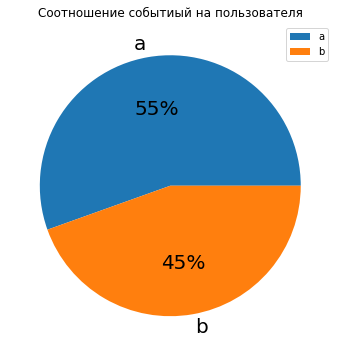

In [35]:
kol = df.pivot_table(index='group', values='user_id', aggfunc='count')

kol['user'] = 0
kol['user'][0] = df.query('group == "a"').user_id.nunique()
kol['user'][1] = df.query('group == "b"').user_id.nunique()

kol['среднее'] = round(kol['user_id'] / kol['user'], 1)

display(kol)

kol.plot(kind='pie', y='среднее', autopct='%1.0f%%', figsize=(6, 6), fontsize=20)
plt.ylabel('')
plt.title('Соотношение событиый на пользователя');

В группы разлицаются на 10 процентов по количеству событий на пользователя.

## По дням

Добавляем столбец для группировки по дням.

In [36]:
df['day'] = df['event_dt'].dt.strftime('%Y-%m-%d')
df.head(4)

,user_id,event_dt,event_name,details,group,first_date,region,device,day
0,831887fe7f2d6cba,2020-12-07 06:50:29,purchase,4.99,a,2020-12-07,eu,android,2020-12-07
1,3c5dd0288ac4fe23,2020-12-07 19:42:40,purchase,4.99,a,2020-12-07,eu,pc,2020-12-07
2,49ea242586c87836,2020-12-07 06:31:24,purchase,99.99,b,2020-12-07,eu,iphone,2020-12-07
3,2b06eb547b7aad08,2020-12-07 21:36:38,purchase,4.99,a,2020-12-07,eu,pc,2020-12-07


Создаем таблицу сгруппированую по дням количества событий

In [37]:
test_events_by_day  = df.groupby('day')['event_dt'].count().reset_index()
test_events_by_day.columns = ['day', 'events']
test_events_by_day.head()

,day,events
0,2020-12-07,578
1,2020-12-08,490
2,2020-12-09,620
3,2020-12-10,512
4,2020-12-11,446


Построем распределение.

In [38]:
a = df.pivot_table(index=['group', 'day'], values='user_id', aggfunc='count').reset_index()
a.head()

,group,day,user_id
0,a,2020-12-07,263
1,a,2020-12-08,283
2,a,2020-12-09,331
3,a,2020-12-10,294
4,a,2020-12-11,309


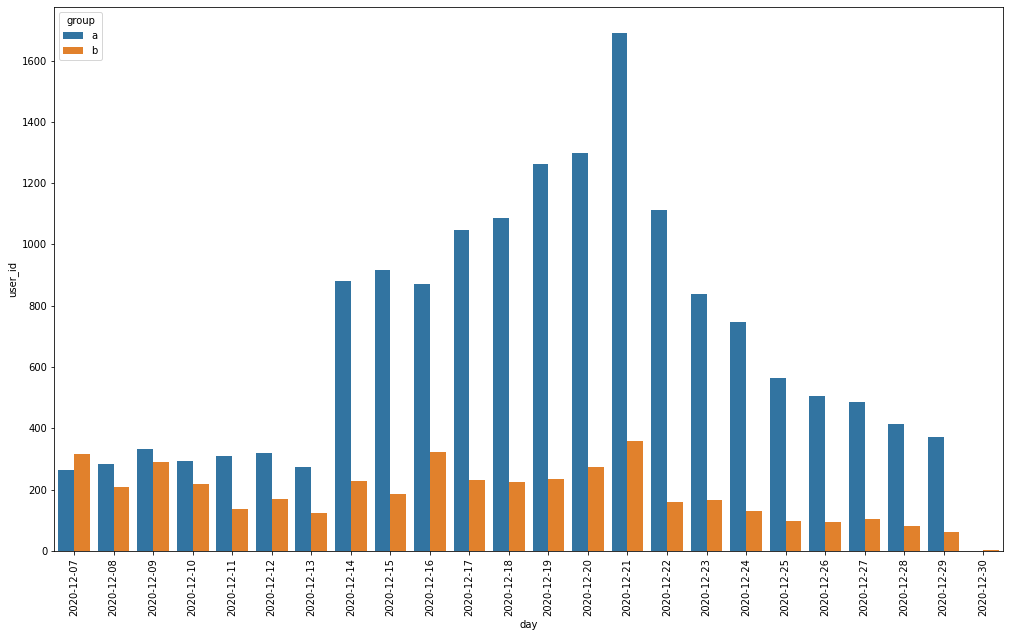

In [39]:
plt.figure(figsize=(17, 10))
ax = sns.barplot(x = 'day', y = 'user_id',data = a,hue='group')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);

Видно, что группе b событий значительно меньше каждый день, кроме первого дня. Посмотрим на эту группу бпоближе, чтобы увидеть изменения.

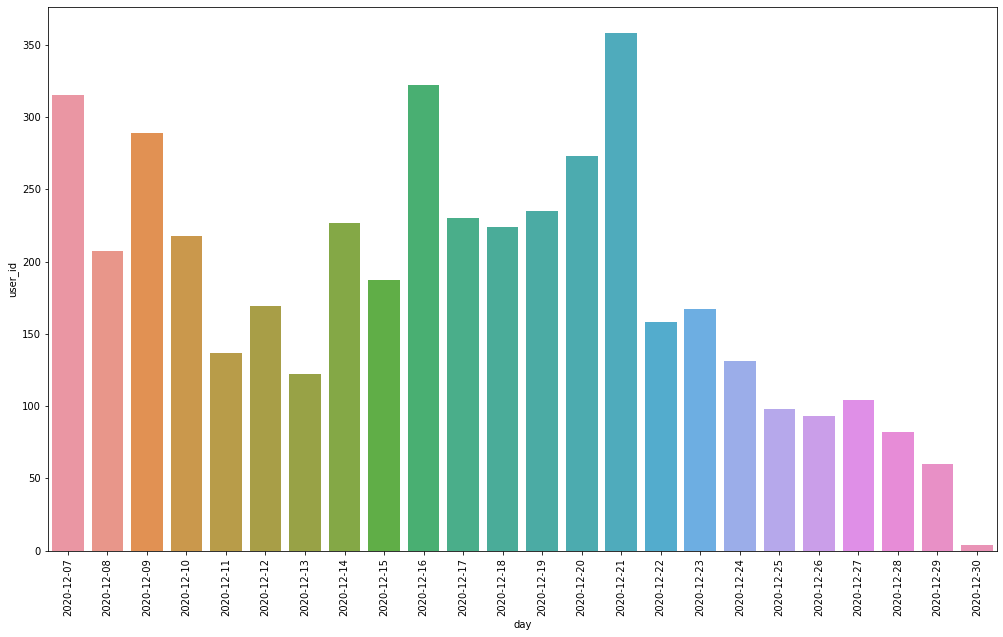

In [40]:
plt.figure(figsize=(17, 10))
ax = sns.barplot(x = 'day', y = 'user_id',data = a[a.group == "b"])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90);

В группе Б количество событий до 13 декабря падает, а в группе А не меняется. А затем в обоих группах идет рост до 21 декабря, затем спад. 30 декабря практически нет событий.

Из исследования проведенного до этого мы значем, что в период тест попали 2 маркейтинговых собятия.

In [41]:
print(display(event_x))

,name,regions,start_dt,finish_dt
0,christmas&new year promo,"eu, n.america",2020-12-25,2021-01-03


None


Событие не повлияло на изменения в группах.

## Конверсия

Изменение конверсии в выборках на раных этапах.

Количество событий.

In [42]:
df['event_name'].value_counts()

login           9306
product_page    5740
purchase        2804
product_cart    2714
Name: event_name, dtype: int64

Сначало пользователь совершает "login" (вход) затем заходит на "product_page"(карту товара), затем идет в корзину (product_cart), и потом совершает покупку (purchase).

In [44]:
df.columns

Index(['user_id', 'event_dt', 'event_name', 'details', 'group', 'first_date',
       'region', 'device', 'day'],
      dtype='object')

In [71]:
funnela = df.query('group == "a"').pivot_table(index=['event_name'], values='user_id', aggfunc='nunique')\
            .sort_values('user_id', ascending=False).user_id
funnela

event_name
login           2279
product_page    1476
purchase         734
product_cart     686
Name: user_id, dtype: int64

In [73]:
funnelb = df.query('group == "b"').pivot_table(index=['event_name'], values='user_id', aggfunc='nunique')\
            .sort_values('user_id', ascending=False).user_id
funnelb

event_name
login           771
product_page    429
purchase        219
product_cart    214
Name: user_id, dtype: int64

Воронки в группах соблюдаются.

In [72]:
fig = go.Figure(go.Funnel(y = funnela.index, x = list(funnela.values), textinfo = "value+percent initial+percent previous"))
fig.update_layout(title="Воронка конверсии для группы a")
fig.show();

In [74]:
fig = go.Figure(go.Funnel(y = funnelb.index, x = funnelb.values, textinfo = "value+percent initial+percent previous"))
fig.update_layout(title="Воронка конверсии для группы b")
fig.show();

Конверсия на этапе страницы с товаром лучше в группе А на 9%.

На этапе корзина относительно предыдущего этапа показывает себя лучше группа Б, но относительно изначального числа все равно группа А. Это может быть связано с тем, что на предыдущем этапе в группе Б было потеряно больше пользователей.

На этап оплата группа Б показла 98% процентов конверсии относительно предыдущего шага, но это на 5 процента больше, чем группа А. А относительного изначального числа все равно уступает.

## Особенности

Если смотреть на техничекое задания, то отклонение от него в части доля пользовтелей из Европы в задании 15%, в тесте 37%

In [47]:
kol

,user_id,user,среднее
group,,,
a,16154,2279,7.1
b,4410,771,5.7


Количество событий в группах отличается примерно в 7 раз, а количество пользователей примерно в 3 раза.

Количество пользователей, у которых не прошло 14 дней с момента регистрации.

In [48]:
print('Количество пользователей:',df.query('first_date >= "2020-12-18"').shape[0])
print('% пользователей:',round(df.query('first_date >= "2020-12-18"').shape[0]/df.shape[0]*100.,1))

Количество пользователей: 7612
% пользователей: 37.0


In [49]:
print('Количество событий 30.12:',a.query('day == "2020-12-30"').shape[0])

Количество событий 30.12: 1


Можно сказать, что у нас данные за 30.12 не полные, и фактически мы располагаем данным по 29.12.

# Оценка результата A/B-тестирования

H0: доли уникальных посетителей, побывавших на этапе воронки, одинаковы.

H1: между долями уникальных посетителей, побывавших на этапе воронки, есть значимая разница.

Альфа-критерий возьмём стандартный 5%.

In [50]:
#Порог значимости
alpha = 0.05

In [51]:
#Создадим функцию, которая будет считать статистическую разницу между группами. На вход подаются номера групп и данные.
def stat_test(group1, group2):
    #df1 с group1
    df1 = df.query('group == @group1')
    
    #df2 с group2
    df2 = df.query('group == @group2')
    
    #количество пользователей в группах
    n1 = df1.user_id.nunique()
    n2 = df2.user_id.nunique()
    
    #перебор событий
    for i in df.event_name.unique():
        if i != 'login':
            print(f'\nРезультат проверки гипотезы между группами {group1} и {group2} для события {i}:')
            #число пользователей на данном событии
            s1 = df1[df1.event_name == i].user_id.nunique()
            s2 = df2[df2.event_name == i].user_id.nunique()
        
            #доля пользователей, которые совершали событие
            d1 = s1 / n1
            d2 = s2 / n2
        
            # пропорция успехов в комбинированном датасете:
            p = (s1 + s2) / (n1 + n2)
        
            #проверка гипотезы о равенстве долей
            z = (d1 - d2) / np.sqrt(p * (1 - p) * ((1 / n1) + (1 / n2)))
        
            # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
            distr = stats.norm(0, 1)
        
            p_value = (1 - distr.cdf(abs(z))) * 2

            print('p-значение: ', round(p_value, 5))
        
            if p_value < alpha:
                print('Отвергаем нулевую гипотезу: между группа есть значимая разница')

            else:
                print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными')

In [52]:
stat_test("a", "b")


Результат проверки гипотезы между группами a и b для события purchase:
p-значение:  0.04894
Отвергаем нулевую гипотезу: между группа есть значимая разница

Результат проверки гипотезы между группами a и b для события product_cart:
p-значение:  0.21721
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными

Результат проверки гипотезы между группами a и b для события product_page:
p-значение:  1e-05
Отвергаем нулевую гипотезу: между группа есть значимая разница


На этапе product_cart между долями нет значимых статистических различий, а на этапе product_page и purchase есть. Но на этапе purchase погранично, если взять альфу равну 0,01, то уже не будет значимых статистических различий.

# Вывод

Проведенно исследования результатов А/Б теста. Проанализированы входные данные.

В данных после проведения тест были обнаружены проблемы:
- количество пользователей в групаах отличается в 3 раза
- количество событий в 7 раза
- по факту тест проводился в Еропе
- фактически данные по 29.12.20г.

Конверсия ожидалось поднять на 15%, но она упала. На этапе страницы с товаром на 9%, на этапе корзина на 4%, а на оплате на 2% относительно изначального количества, но на 5% увеличилось относительно предыдушего шага.

**Результаты A/B-тестирования:**

На этапе product_cart между долями нет значимых статистических различий, а на этапе product_page и purchase есть. Но на этапе purchase погранично, если взять альфу равну 0,01, то уже не будет значимых статистических различий.

**Вывод:**

Улучшение рекомендаций для регионов привело к улучшению метрик на этапе product_page. На этапе purchase погранично. На этапе product_cart не привело к улучшению.

**Рекомендации:**

Необходимо првоести дополнительное исследовани, чтобы понять, что привело к увеличению активности пользователей с 14 декабря по 21 декабря.